Import the neccessary libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline

Data Loading and Initial Setup

In [18]:
# Define the file paths for the uploaded training and testing data
TRAIN_FILE = "train.csv"
TEST_FILE = "test.csv"

# Define the human-readable labels corresponding to the Class Index (1 to 4)
CLASS_LABELS = {
    1: "World",
    2: "Sports",
    3: "Business",
    4: "Sci/Tech",
}

print("Loading Data......")
try:
    df_train = pd.read_csv(TRAIN_FILE,header=None,names=["Class Index","Title","Description"])
    df_test = pd.read_csv(TEST_FILE,header=None,names=["Class Index","Title","Description"])
    print(f"Training samples loaded: {len(df_train)}")
    print(f"Testing samples loaded: {len(df_test)}")
except Exception as e:
    print(f"Error loading files: {e}")
    exit()



df_train

Loading Data......
Training samples loaded: 120001
Testing samples loaded: 7601
Training samples loaded: 120001
Testing samples loaded: 7601


,Class Index,Title,Description
0,Class Index,Title,Description
1,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
2,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
3,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
4,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
...,...,...,...
119996,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119997,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119998,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119999,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


Pre-training visualization (EDA)

EDA: Class Distribution (Before Training)


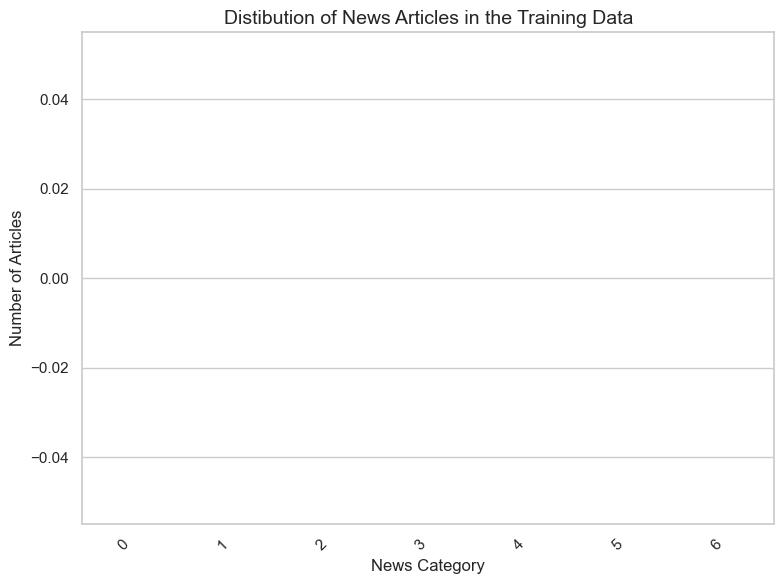

In [19]:
# Map the numerical index to the actual category name for better visualization
df_train["Category"] = df_train["Class Index"].map(CLASS_LABELS)

print("EDA: Class Distribution (Before Training)")




sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,6))
sns.countplot(data=df_train,x="Category",order=df_train["Category"].value_counts().index)
plt.title("Distibution of News Articles in the Training Data",fontsize=14)
plt.xlabel("News Category",fontsize=12)
plt.ylabel("Number of Articles", fontsize=12)
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.show()

Feature Engineering (Text Processing)

In [20]:
# Combine the "Title" and "Description" columns into a single text feature for both train and test set
X_train = df_train["Title"] + " " + df_train["Description"]
y_train = df_train["Class Index"]
X_test = df_test["Title"] + " " + df_test["Description"]
y_test = df_test["Class Index"]

# Create the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    stop_words="english",
    ngram_range=(1,2),
    max_features=10000
)

# Fit the vectorizer on the training data and transform both the training and test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"Feature Matrix Shape (Training): {X_train_tfidf.shape}")

Feature Matrix Shape (Training): (120001, 10000)


Model Comparison and Training

In [21]:
classifiers = {
    "Logistic Regression": LogisticRegression(solver="liblinear",random_state=42,max_iter=1000),
    "Multinominal Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(random_state=42,dual=False),
    "Random Forest": RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=1)
}

results = {}

# Iterate though each classifier, train and evaluate its performance
print("Training and Evaluting Models")
for name, model in classifiers.items():
    print(f"Training {name}....")
    model.fit(X_train_tfidf,y_train)
    y_pred = model.predict(X_test_tfidf)

    # Evaluate the model
    accuracy = accuracy_score(y_test,y_pred)
    results[name] = accuracy

    # Print a detailed classification report
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"Classification Report for {name}:")
    # Generate the report including Precision, Recall and F1-Score for each class
    print(classification_report(y_test, y_pred, labels=list(CLASS_LABELS.keys()), target_names=list(CLASS_LABELS.values())))


# Determine the best performing model based on accuracy
best_model_name = max(results,keys=results.get)
best_model = classifiers[best_model_name]
print(f"Best Model Found: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")

Training and Evaluting Models
Training Logistic Regression....
Logistic Regression Accuracy: 0.9147
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

       World       0.93      0.91      0.92      1900
      Sports       0.95      0.98      0.97      1900
    Business       0.89      0.88      0.88      1900
    Sci/Tech       0.89      0.89      0.89      1900

   micro avg       0.91      0.91      0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600

Training Multinominal Naive Bayes....
Logistic Regression Accuracy: 0.9147
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

       World       0.93      0.91      0.92      1900
      Sports       0.95      0.98      0.97      1900
    Business       0.89      0.88      0.88      1900
    Sci/Tech       0.89      0.89      0.89      1900

   micro avg       0.91 

KeyboardInterrupt: 

Post Training Visualization